# NLP- Analysis

# Abstract:

This notebook consists of :

1. Applying Text_cleaning on reviews grouped by star_ratings
2. Sentiment Analysis including Polarity and Subjectivity
3. Comparing review_polarities vs review_star_ratings to reflect which term is more informative
4. TF_IDF and word_count analysis to reflect how important a word is to a review and how many times it has been repeated
5. Word-Embeding analysis to gain further insights about boutique reviews 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import re
import nltk
import string
import pickle

from gensim.models import Phrases
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser
from gensim.summarization.textcleaner import split_sentences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from matplotlib import pyplot

from textblob import TextBlob, Word, Blobber
# to install textblob in your conda packages:
# 1. go to anaconda prompt
# 2. cd Anaconda3>Scripts>conda install -c conda-forge textblob
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from NLP_Analysis_classes import sentiment_analysis, tfidf_analysis, word_embedding

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import required dataframes from web scraping notebook  to start analysing

1. boutique names and information "boutique_info"  
2. boutique reviews "boutique_review" 

In [3]:
#import the final boutique_info dataframe from the web scraping notebooke:
with open('boutique_info.pickle','rb') as f_read:
    boutique_info = pickle.load(f_read)
#set wider columns to check the reviews:    
pd.options.display.max_colwidth = 200 
#boutique_info.head()

In [4]:
#import the final boutique_review dataframe from the web scraping notebooke:
with open('boutique_reviews.pickle','rb') as f_read:
    boutique_reviews = pickle.load(f_read)
#set wider columns to check the reviews:
pd.options.display.max_colwidth = 500  
#delete unnecessary columns like review_counts:
del boutique_reviews['review_counts']
#boutique_reviews.head()

## Sentiment Analysis:

#### 1. Apply text cleaning and stop-words removal to clean each review
#### 2. Get the sentiment of each review
#### 3. Display polarity over time for each specific boutique to monitor the customer satisfaction during time
we will consider a time period of two years
#### 4.Comparing review_polarity vs review_star_ratings

current_date:  2008-04-05 00:00:00
end_date:  2020-04-26 00:00:00
window_start:  2007-04-11 00:00:00
window_end:  2009-03-31 00:00:00
time_delta:  30 days 00:00:00


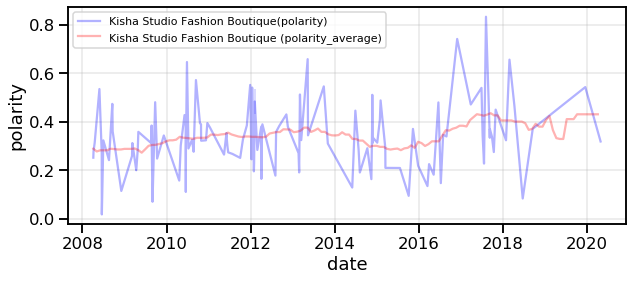

In [5]:
boutique_list = ["Kisha Studio Fashion Boutique"]
obj = sentiment_analysis(boutique_reviews)
obj.sentiment_analysis_summary(boutique_list)

**So the sentiment analysis shows that review_polarity for Kishna Boutique will increases during the time.**

**Compare review_polarity vs review_star_ratings**:

120 reviews used


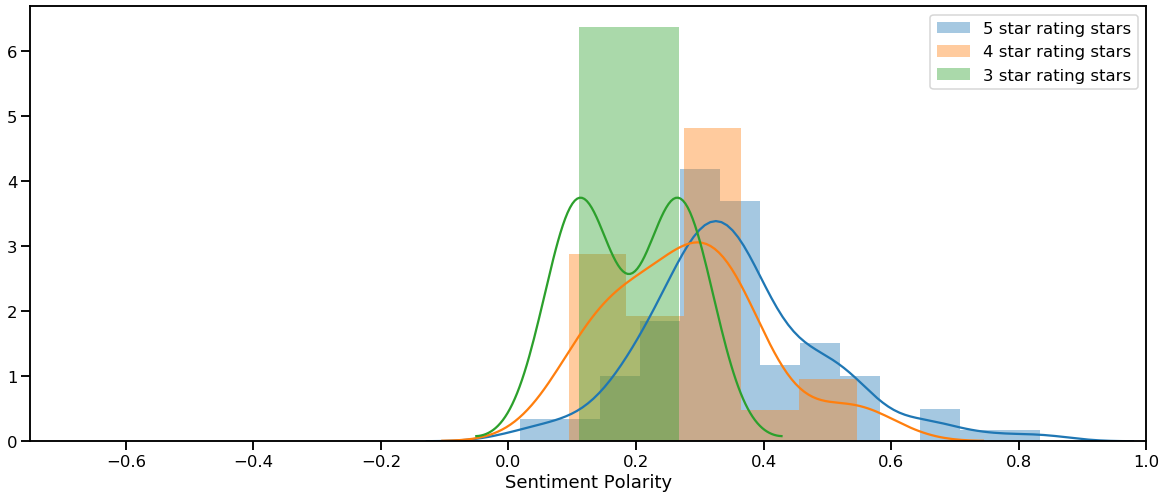

In [6]:
boutique_list=["Kisha Studio Fashion Boutique"]
obj_c = sentiment_analysis(boutique_reviews)
subset_df_clean = obj_c.clean_review(boutique_list)
subset_df_clean_sentiment = obj_c.subset_df_sentiment(subset_df_clean)
obj_c.compare_polarity_vs_ratings(subset_df_clean_sentiment)

**So as predicted, reviews with more star_ratings, have the higher polarity.**

### 5. TF-IDF Analysis

#### tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document.
#### we are counting the most important words for the avarage star ratings

,tfidf_scores,boutique_name,average_star_ratings
outfit,0.280056,Onyx,4.5 star rating
friend,0.280056,Onyx,4.5 star rating
amazing,0.280056,Onyx,4.5 star rating
wild,0.140028,Onyx,4.5 star rating
women,0.140028,Onyx,4.5 star rating
parade,0.140028,Onyx,4.5 star rating
pride,0.140028,Onyx,4.5 star rating
rebecca,0.140028,Onyx,4.5 star rating
rose,0.140028,Onyx,4.5 star rating
service,0.140028,Onyx,4.5 star rating


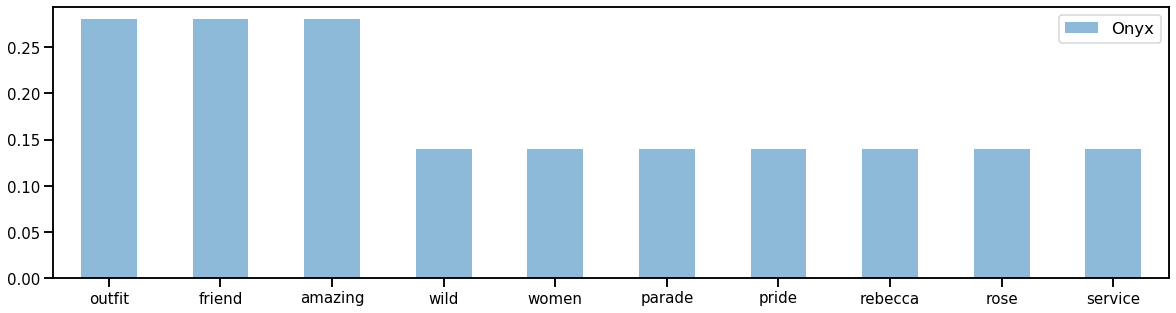

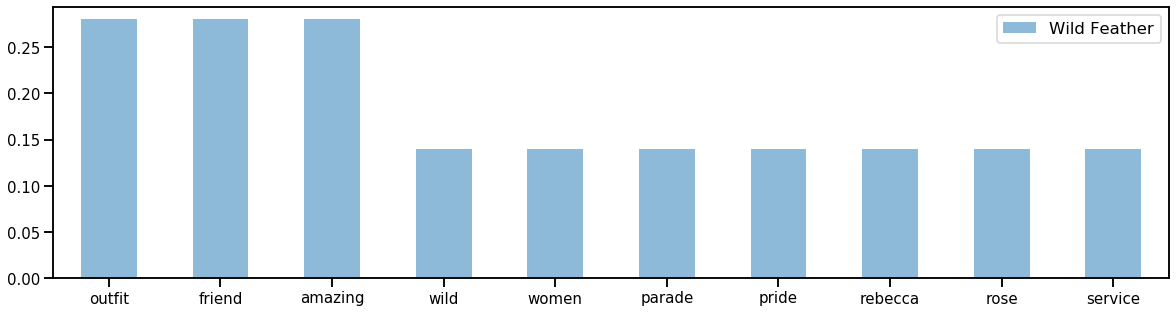

In [7]:
boutique_list = ["Onyx", "Wild Feather"]
obj_tfidf = tfidf_analysis(boutique_reviews, boutique_info )
reviews = obj_tfidf.clean_review(boutique_list)
boutique_tfidf = obj_tfidf.get_tfidf(reviews,boutique_list)
boutique_tfidf

### Word count
we are counting the most repeated words in the reviews for the avarage star ratings

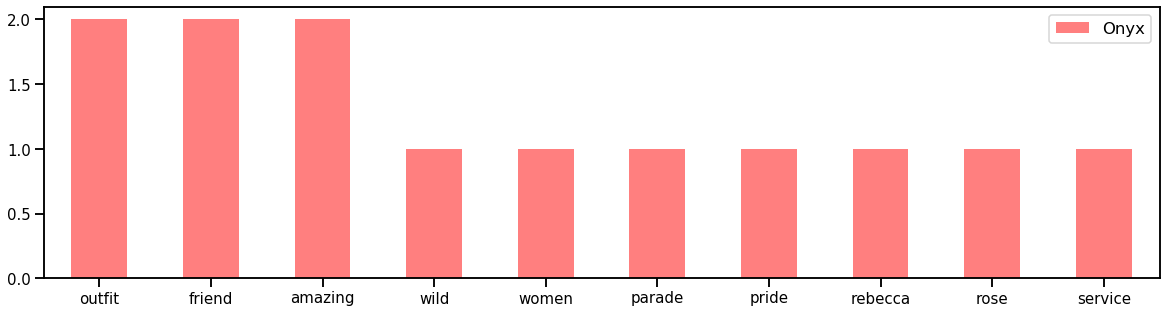

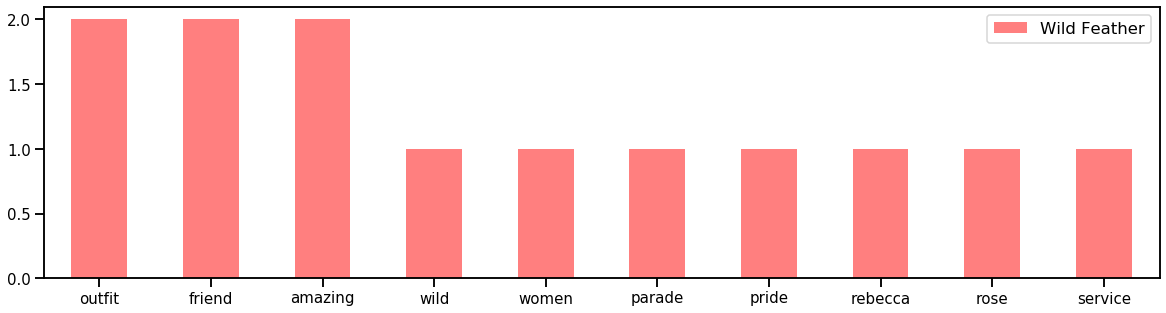

In [8]:
boutique_word_count = obj_tfidf.get_word_count(reviews,boutique_list)

### Word Embedding Analysis

To represent words and documents using a dense vector representation.

Two popular examples of methods of learning word embeddings from text include:
1. Word2Vec.
2. GloVe.

cluster similar words from the context of reviews based on their star ratings

1 star rating : 1 reviews 

4 star rating : 4 reviews 

words in reviews with minimum_count of 3: Word2Vec(vocab=16, size=100, alpha=0.025) 



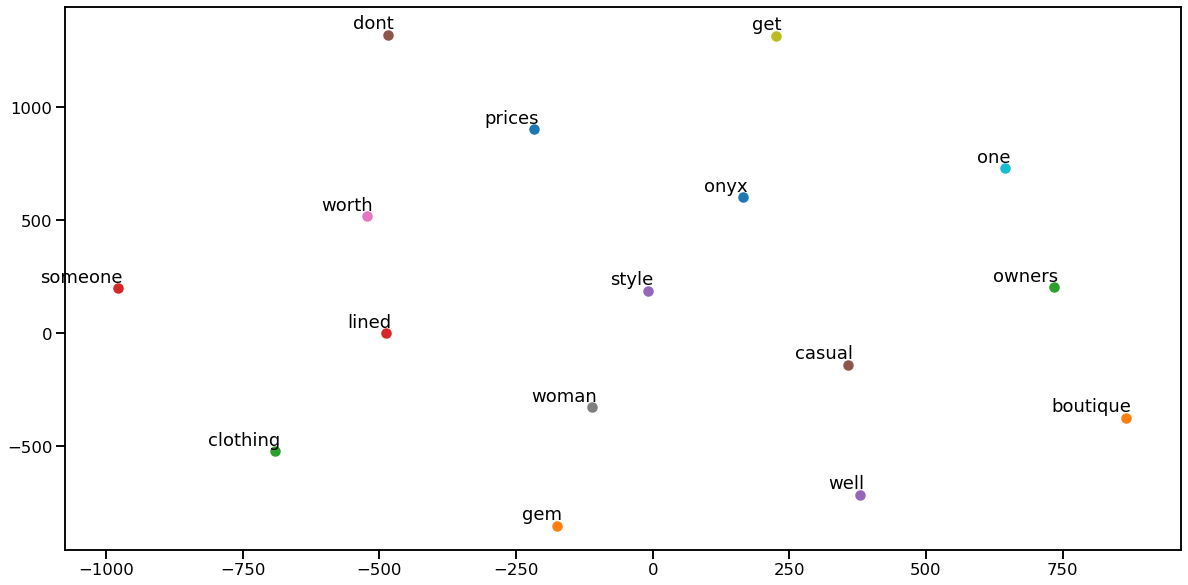

5 star rating : 12 reviews 

words in reviews with minimum_count of 3: Word2Vec(vocab=44, size=100, alpha=0.025) 



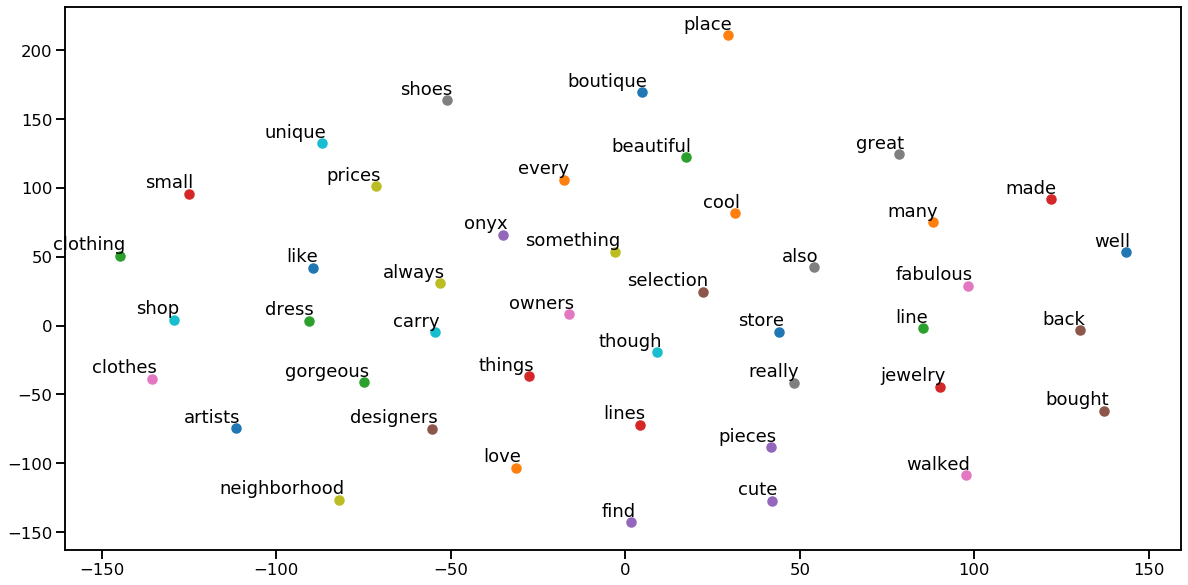

In [9]:
boutique_name = "Onyx"
obj_wordembed = word_embedding(boutique_reviews)
sub = obj_wordembed.word2vec_model(boutique_name)
sub